# Biomassa

Os dados considerados fazem parte de um estudo maior conduzido pelo 
Dr. Rick Linthurst (1979) na North Carolina State University. 

O objetivo de sua pesquisa era identificar as características mais importantes do solo
que influenciam a produção de biomassa aérea da grama do pântano "Spartina alterniﬂora" 
no Estuário Cape Fear da Carolina do Norte.

Uma fase da pesquisa de Linthurst consistiu na amostragem de três tipos de
Vegetação Spartina (áreas "mortas" revegetadas, áreas "curtas" de Spartina e
Áreas "altas" de Spartina) em cada um dos três locais (Oak Island, Smith Island,
e Snows Marsh). 

# Biomassa

Amostras do substrato do solo de 5 locais aleatórios dentro
cada local - tipo de vegetação (dando 45 amostras no total) foram analisados ​​para
14 características físico-químicas do solo a cada mês durante vários meses.
Além disso, a biomassa acima do solo em cada local de amostra foi medida em cada
mês. Os dados usados ​​neste estudo de caso envolvem apenas a amostra de setembro
e estas cinco medições de substrato:

X1 = salinidade

X2 = acidez medida em água (pH)

X3 = potássio ppm (K)

X4 = sódio ppm (Na)

X5 = zinco ppm (Zn).

A variável dependente Y é a biomassa aérea gm^{-2}.

In [77]:
# Carregando bibliotecas

if(!require(car)) install.packages("car", repos = "http://cran.us.r-project.org")
suppressMessages(if(!require(tidyverse)) install.packages("tidyverse", repos = "http://cran.us.r-project.org"))
if(!require(corrplot)) install.packages("corrplot", repos = "http://cran.us.r-project.org")
if(!require(olsrr)) install.packages("olsrr", repos = "http://cran.us.r-project.org")

In [78]:
# Importando os dados
dados<-read_csv("/home/ffajardo/jupyter/datasets/biomass.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Obs. = col_double(),
  Loc. = col_character(),
  Type = col_character(),
  BIO = col_number(),
  SAL = col_double(),
  pH = col_double(),
  K = col_number(),
  Na = col_number(),
  Zn = col_double()
)




In [79]:
summary(dados)

      Obs.        Loc.               Type                BIO        
 Min.   : 1   Length:45          Length:45          Min.   :  14.0  
 1st Qu.:12   Class :character   Class :character   1st Qu.: 328.0  
 Median :23   Mode  :character   Mode  :character   Median : 504.0  
 Mean   :23                                         Mean   : 761.6  
 3rd Qu.:34                                         3rd Qu.:1008.0  
 Max.   :45                                         Max.   :2436.0  
      SAL              pH              K                Na       
 Min.   :24.00   Min.   :3.200   Min.   : 350.7   Min.   : 7886  
 1st Qu.:27.00   1st Qu.:3.450   1st Qu.: 528.6   1st Qu.:11345  
 Median :30.00   Median :4.450   Median : 773.3   Median :14752  
 Mean   :30.27   Mean   :4.602   Mean   : 797.6   Mean   :16597  
 3rd Qu.:33.00   3rd Qu.:5.200   3rd Qu.: 954.1   3rd Qu.:20436  
 Max.   :38.00   Max.   :7.450   Max.   :1441.7   Max.   :35186  
       Zn         
 Min.   : 0.2105  
 1st Qu.:13.9852 

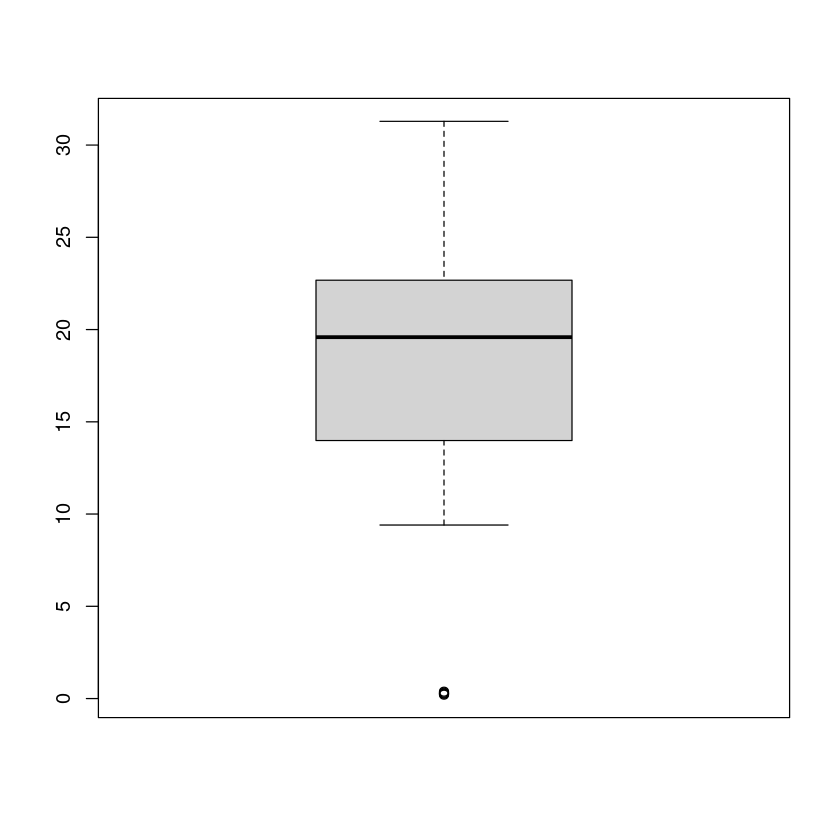

In [90]:
# Comparação das distribuições

boxplot(dados$Zn) #boxplot(dados[c(-1:-3)])

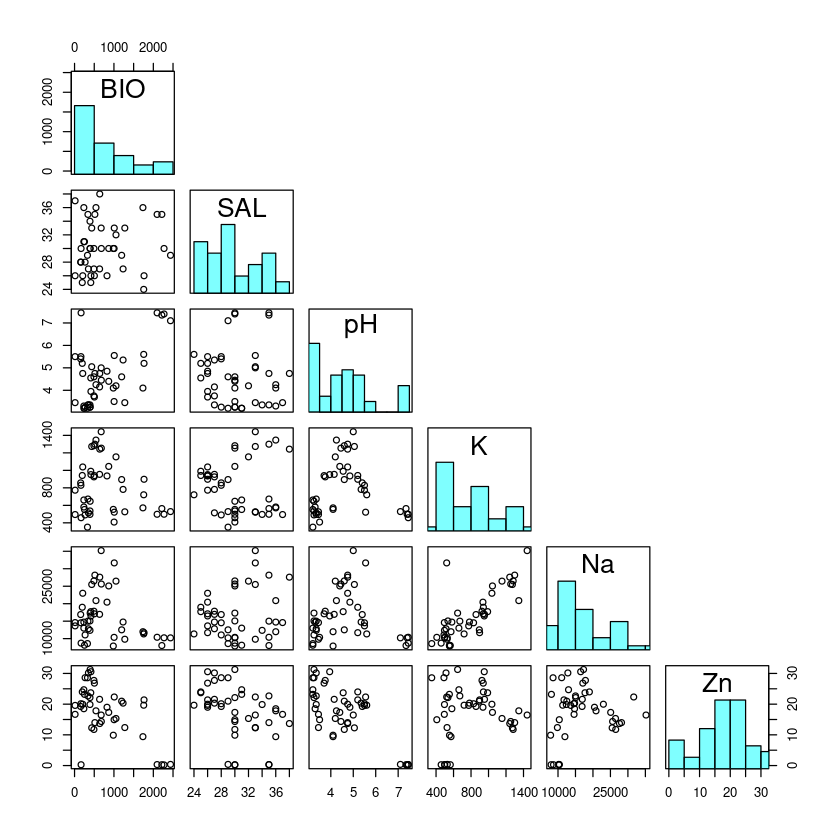

In [91]:
panel.hist <- function(x, ...) {
    usr <- par("usr")
    on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5))
    his <- hist(x, plot = FALSE)
    breaks <- his$breaks
    nB <- length(breaks)
    y <- his$counts
    y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = rgb(0, 1, 1, alpha = 0.5), ...)
    # lines(density(x), col = 2, lwd = 2) # Uncomment to add density lines
}

pairs(dados[c(-1:-3)],upper.panel = NULL,diag.panel = panel.hist)

,BIO,SAL,pH,K,Na,Zn
BIO,1.00000000,0.09069225,0.57429139,-0.19402213,-0.25182652,-0.6132172
SAL,0.09069225,1.00000000,-0.05133280,-0.02063286,0.16226665,-0.4208335
pH,0.57429139,-0.05133280,1.00000000,0.01922804,-0.03771858,-0.7221671
K,-0.19402213,-0.02063286,0.01922804,1.00000000,0.79209602,0.0736092
Na,-0.25182652,0.16226665,-0.03771858,0.79209602,1.00000000,0.1170453
Zn,-0.61321716,-0.42083353,-0.72216711,0.07360920,0.11704532,1.0000000


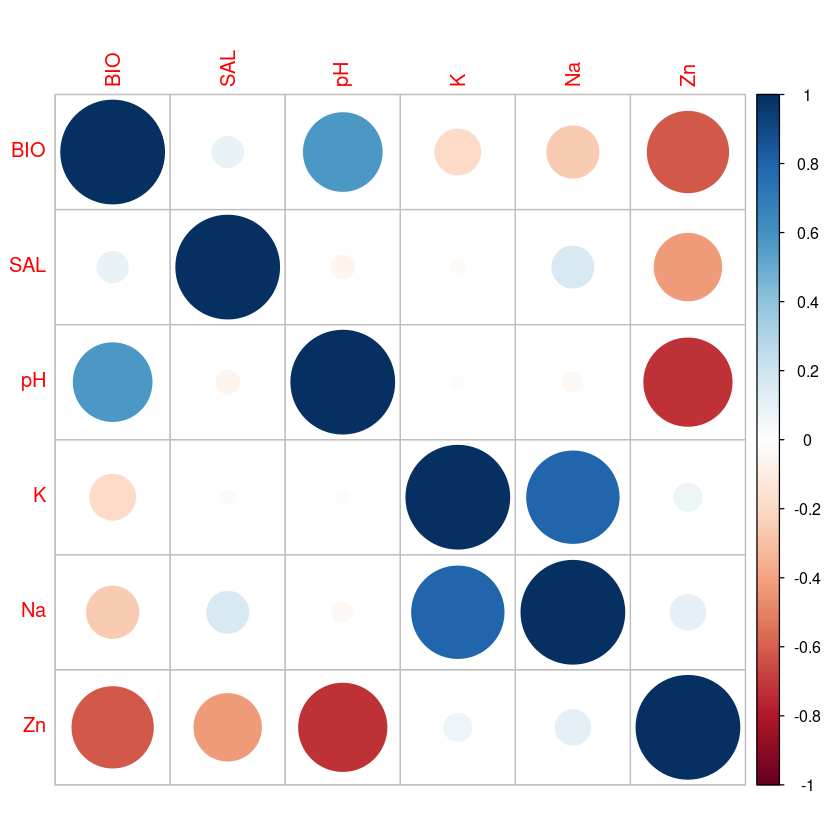

In [92]:
# Matriz de correlação
rho.matrix<-cor(dados[,c(-1:-3)]); rho.matrix; corrplot(rho.matrix)

In [95]:
# Ajuste do modelo

fit<-lm(BIO~SAL+pH+K+Na+Zn-1,data=dados); summary(fit);


Call:
lm(formula = BIO ~ SAL + pH + K + Na + Zn - 1, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-1691.1  -187.9    67.0   304.7   915.0 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)   
SAL  14.54912   12.12816   1.200  0.23735   
pH  214.71269   60.60761   3.543  0.00102 **
K    -0.01816    0.42133  -0.043  0.96583   
Na   -0.01901    0.01878  -1.012  0.31761   
Zn  -19.03000    9.06954  -2.098  0.04225 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 506.9 on 40 degrees of freedom
Multiple R-squared:  0.769,	Adjusted R-squared:  0.7401 
F-statistic: 26.63 on 5 and 40 DF,  p-value: 9.496e-12


In [96]:
anova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
SAL,1,26199928.8,26199928.8,101.949029,1.461003e-12
pH,1,5408971.7,5408971.7,21.047363,4.359209e-05
K,1,1201114.8,1201114.8,4.673772,3.666534e-02
Na,1,280545.6,280545.6,1.091658,3.023775e-01
Zn,1,1131420.3,1131420.3,4.402577,4.224660e-02
Residuals,40,10279618.8,256990.5,NA,NA


In [97]:
ols_step_forward_aic(fit,details = TRUE)

Forward Selection Method 
------------------------

Candidate Terms: 

1 . SAL 
2 . pH 
3 . K 
4 . Na 
5 . Zn 

 Step 0: AIC = 713.1585 
 BIO ~ 1 

-------------------------------------------------------------------------------
Variable     DF      AIC        Sum Sq           RSS         R-Sq     Adj. R-Sq 
-------------------------------------------------------------------------------
Zn            1    693.934    6919066.179    11480978.621    0.376        0.362 
pH            1    697.150    6068529.761    12331515.039    0.330        0.314 
Na            1    712.210    1166868.209    17233176.591    0.063        0.042 
K             1    713.432     692662.094    17707382.706    0.038        0.015 
SAL           1    714.787     151341.921    18248702.879    0.008       -0.015 
-------------------------------------------------------------------------------


- Zn 


 Step 1 : AIC = 693.9338 
 BIO ~ Zn 

------------------------------------------------------------------------------


                             Selection Summary                              
---------------------------------------------------------------------------
Variable       AIC        Sum Sq           RSS          R-Sq      Adj. R-Sq 
---------------------------------------------------------------------------
Zn           693.934    6919066.179    11480978.621    0.37604      0.36152 
pH           693.251    7583505.745    10816539.055    0.41215      0.38415 
Na           692.251    8281008.516    10119036.284    0.45005      0.40981 
---------------------------------------------------------------------------

In [98]:
ols_step_backward_aic(fit, details = TRUE)

Backward Elimination Method 
---------------------------

Candidate Terms: 

1 . SAL 
2 . pH 
3 . K 
4 . Na 
5 . Zn 

 Step 0: AIC = 694.96 
 BIO ~ SAL + pH + K + Na + Zn 

------------------------------------------------------------------------------
Variable     DF      AIC        Sum Sq          RSS         R-Sq     Adj. R-Sq 
------------------------------------------------------------------------------
K            1     694.176     26136.823    10102120.038    0.451        0.396 
SAL          1     694.193     29980.610    10105963.825    0.451        0.396 
Na           1     694.474     93183.380    10169166.595    0.447        0.392 
pH           1     695.607    352621.316    10428604.531    0.433        0.377 
Zn           1     697.546    811727.575    10887710.790    0.408        0.349 
------------------------------------------------------------------------------


Variables Removed: 

- K 


  Step 1 : AIC = 694.1762 
 BIO ~ SAL + pH + Na + Zn 

-------------------------



                         Backward Elimination Summary                         
----------------------------------------------------------------------------
Variable        AIC          RSS           Sum Sq        R-Sq      Adj. R-Sq 
----------------------------------------------------------------------------
Full Model    694.960    10075983.215    8324061.585    0.45239      0.38219 
K             694.176    10102120.038    8297924.762    0.45097      0.39607 
SAL           692.251    10119036.284    8281008.516    0.45005      0.40981 
----------------------------------------------------------------------------


In [99]:
ols_step_both_aic(fit, details = TRUE)

Stepwise Selection Method 
-------------------------

Candidate Terms: 

1 . SAL 
2 . pH 
3 . K 
4 . Na 
5 . Zn 

 Step 0: AIC = 713.1585 
 BIO ~ 1 


Variables Entered/Removed: 

                               Enter New Variables                             
-------------------------------------------------------------------------------
Variable     DF      AIC        Sum Sq           RSS         R-Sq     Adj. R-Sq 
-------------------------------------------------------------------------------
Zn            1    693.934    6919066.179    11480978.621    0.376        0.362 
pH            1    697.150    6068529.761    12331515.039    0.330        0.314 
Na            1    712.210    1166868.209    17233176.591    0.063        0.042 
K             1    713.432     692662.094    17707382.706    0.038        0.015 
SAL           1    714.787     151341.921    18248702.879    0.008       -0.015 
-------------------------------------------------------------------------------

- Zn added 





                                    Stepwise Summary                                    
--------------------------------------------------------------------------------------
Variable     Method       AIC          RSS           Sum Sq        R-Sq      Adj. R-Sq 
--------------------------------------------------------------------------------------
Zn          addition    693.934    11480978.621    6919066.179    0.37604      0.36152 
pH          addition    693.251    10816539.055    7583505.745    0.41215      0.38415 
Na          addition    692.251    10119036.284    8281008.516    0.45005      0.40981 
--------------------------------------------------------------------------------------


In [100]:
fit.subset<-ols_step_best_subset(fit); #plot(fit.subset)
fit.subset

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,1,1,Zn,0.3760353,0.3615245,0.2879101,3.674725,693.9338,566.2583,699.3537,12015543,278866.1,0.6820079,6357.131
12,2,2,pH Zn,0.4121460,0.3841530,0.2817392,3.089261,693.2511,565.9520,700.4777,11596268,274705.8,0.6718331,6281.382
24,3,3,pH Na Zn,0.4500537,0.4098137,0.2944500,2.375142,692.2515,565.6490,701.2848,11119697,268744.1,0.6572529,6170.144
28,4,4,SAL pH Na Zn,0.4509731,0.3960704,0.2728304,4.309318,694.1762,567.8775,705.0161,11385751,280614.4,0.6862837,6475.718
31,5,5,SAL pH K Na Zn,0.4523935,0.3821876,0.1909746,6.207614,696.0596,570.0843,708.7062,11655143,292806.3,0.7161007,6798.909


In [103]:
fit2<-lm(BIO~pH+Na+Zn-1,data=dados); summary(fit2); anova(fit2)


Call:
lm(formula = BIO ~ pH + Na + Zn - 1, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-1708.78  -174.56    50.67   292.67   938.51 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
pH 269.86140   34.96088   7.719 1.39e-09 ***
Na  -0.01516    0.01090  -1.391   0.1714    
Zn -13.53452    7.56208  -1.790   0.0807 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 503.6 on 42 degrees of freedom
Multiple R-squared:  0.7606,	Adjusted R-squared:  0.7435 
F-statistic: 44.49 on 3 and 42 DF,  p-value: 4.218e-13


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
pH,1,31052171,31052171.1,122.435503,5.020847e-14
Na,1,1984929,1984928.9,7.826370,7.738423e-03
Zn,1,812433,812433.0,3.203339,8.069976e-02
Residuals,42,10652067,253620.6,NA,NA


In [105]:
ols_regress(BIO~pH+Na+Zn-1,data=dados)

                          Model Summary                            
------------------------------------------------------------------
R                       0.872       RMSE                  503.608 
R-Squared               0.761       Coef. Var              66.125 
Adj. R-Squared          0.744       MSE                253620.644 
Pred R-Squared          0.709       MAE                   345.295 
------------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                  ANOVA                                   
-------------------------------------------------------------------------
                    Sum of                                               
                   Squares        DF     Mean Square      F         Sig. 
-------------------------------------------------------------------------
Regression    33849532.948         3    11283177.649    44.488    0.0000 
R

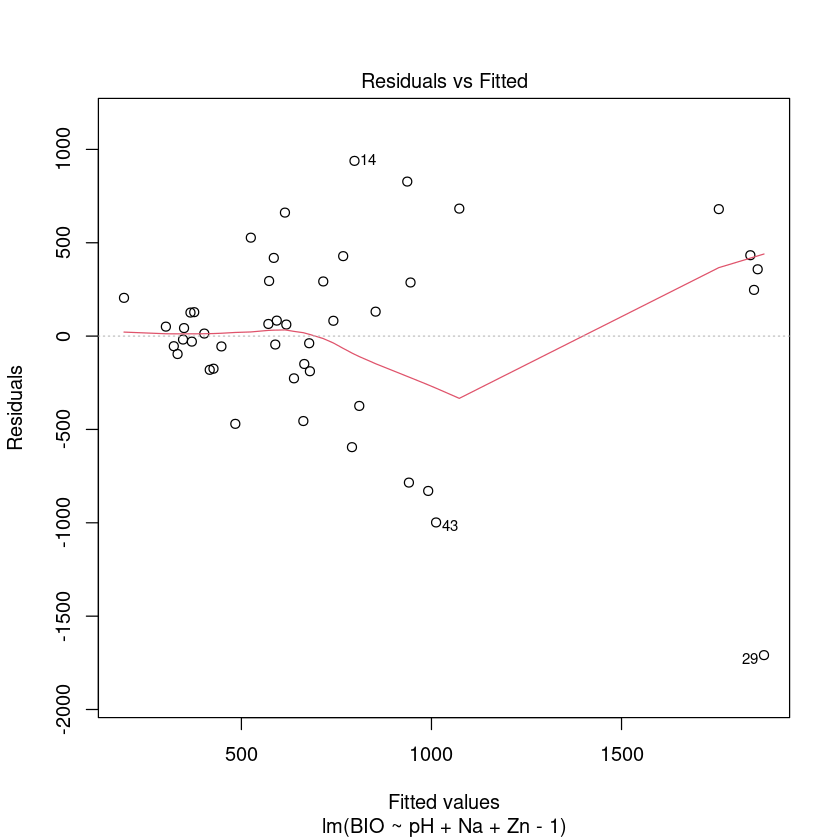

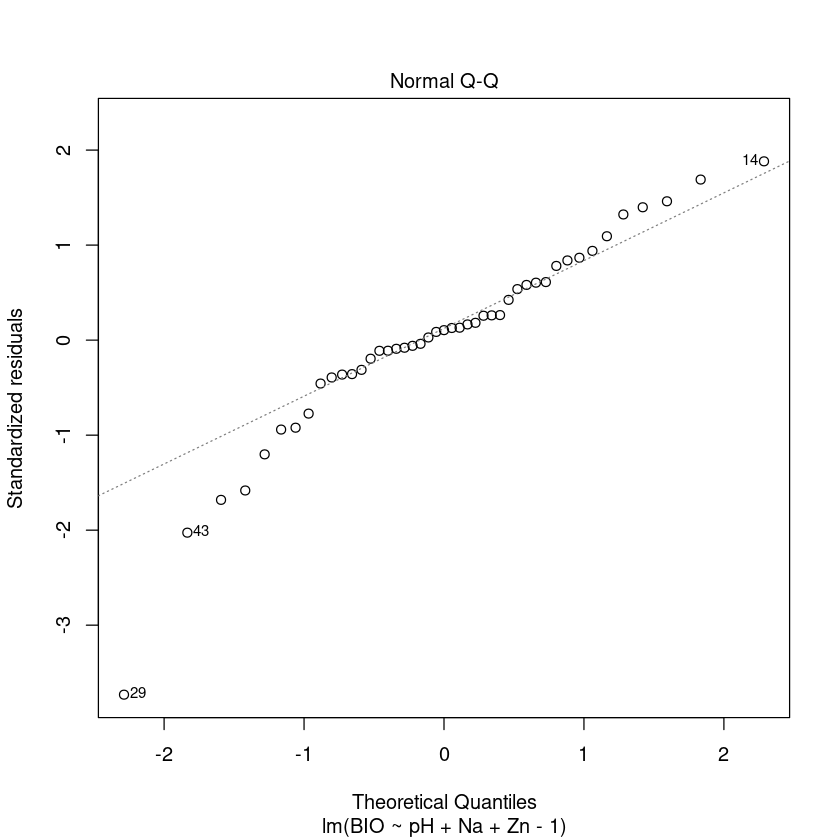

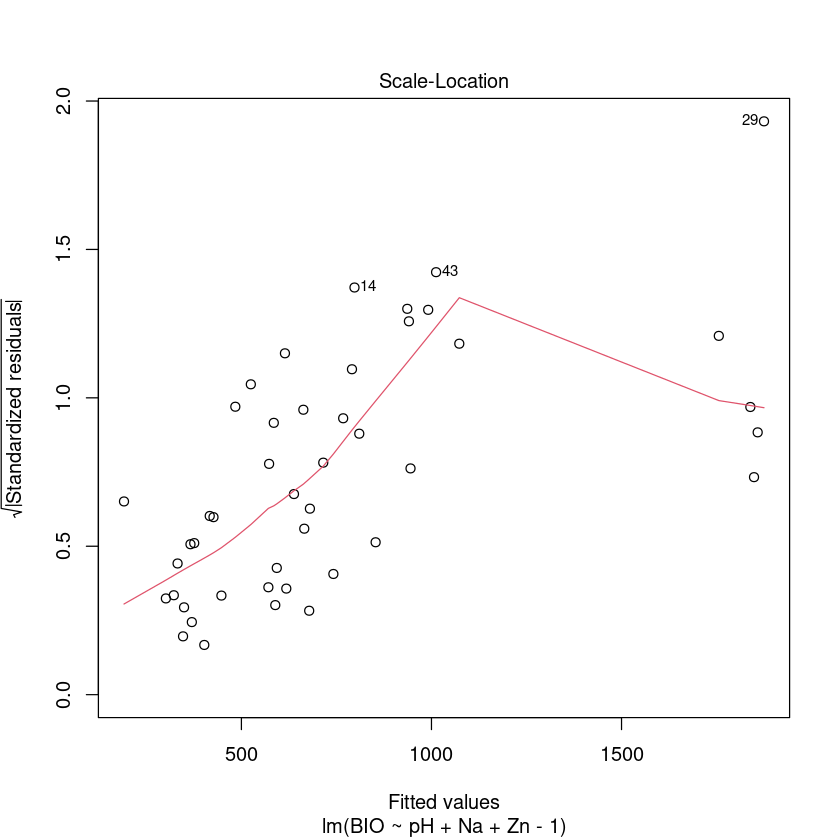

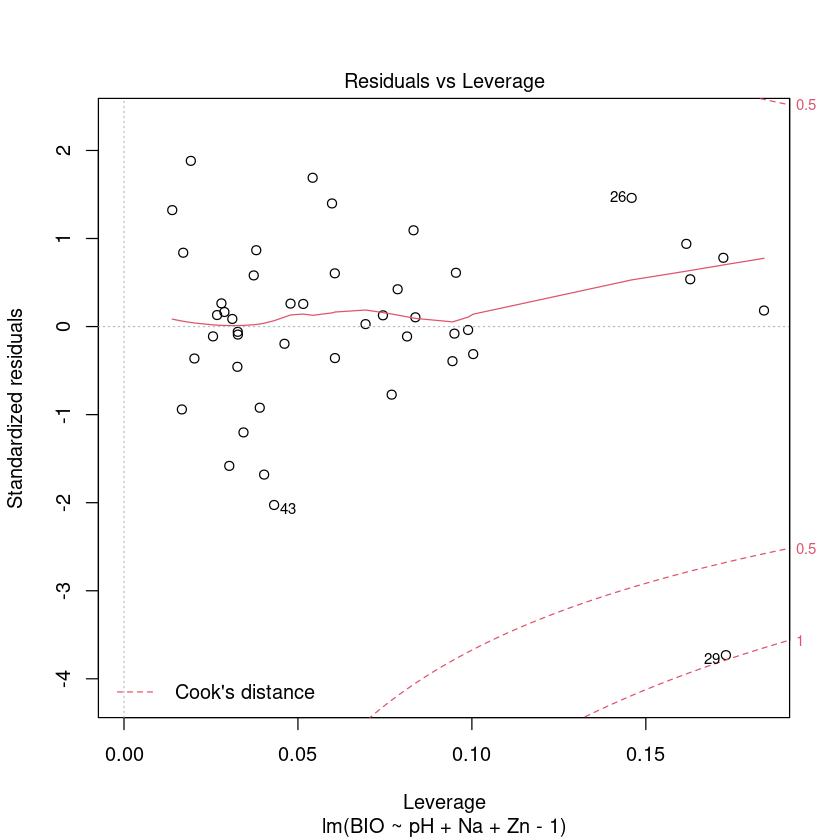

In [106]:
plot(fit2)

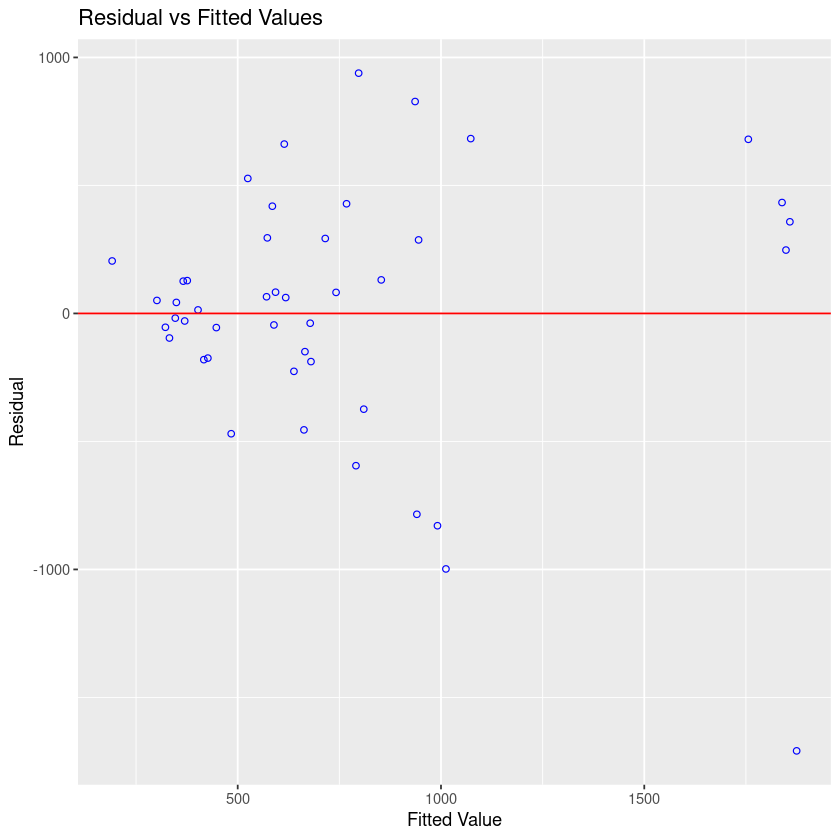

In [107]:
ols_plot_resid_fit(fit2)

In [108]:
ols_test_breusch_pagan(fit2) # Heteroscedasticidade


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

             Data               
 -------------------------------
 Response : BIO 
 Variables: fitted values of BIO 

         Test Summary           
 -------------------------------
 DF            =    1 
 Chi2          =    23.43245 
 Prob > Chi2   =    1.293774e-06 

In [109]:
ols_test_score(fit2) # Heteroscedasticidade


 Score Test for Heteroskedasticity
 ---------------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: fitted values of BIO 

         Test Summary           
 -------------------------------
 DF            =    1 
 Chi2          =    11.60632 
 Prob > Chi2   =    0.0006572798 

In [110]:
ols_test_f(fit2) # Heteroscedasticidade


 F Test for Heteroskedasticity
 -----------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: fitted values of BIO 

        Test Summary         
 ----------------------------
 Num DF     =    1 
 Den DF     =    43 
 F          =    14.9451 
 Prob > F   =    0.0003691617 

In [111]:
ols_coll_diag(fit2) # Colinearidade

Tolerance and Variance Inflation Factor
---------------------------------------
  Variables Tolerance     VIF
1        Na 0.9863004 1.01389
2        Zn 0.9863004 1.01389


Eigenvalue and Condition Index
------------------------------
  Eigenvalue Condition Index  intercept         Na         Zn
1 2.70058146        1.000000 0.02489674 0.01890216 0.03048031
2 0.20249557        3.651917 0.39195742 0.01263971 0.74526699
3 0.09692297        5.278558 0.58314584 0.96845813 0.22425270

# Medidas de influência

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
1,0.180179,0.18396780,0.002497142
26,1.481905,0.14592403,0.121605999
29,-4.508704,0.17301812,0.970879547
43,-2.107548,0.04314876,0.061709484


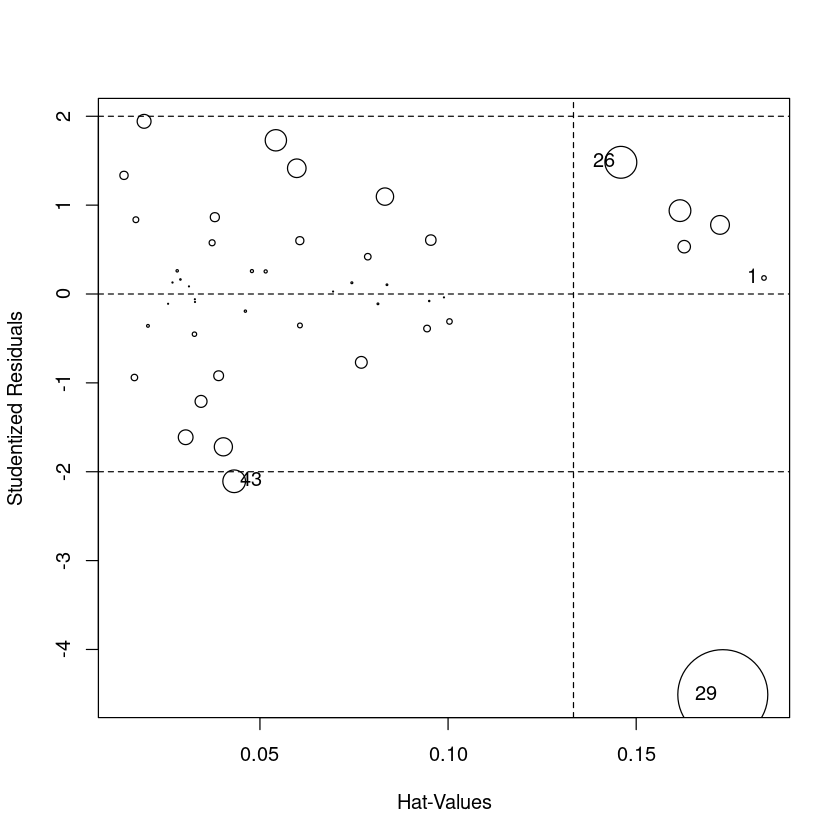

In [112]:
influencePlot(fit2)

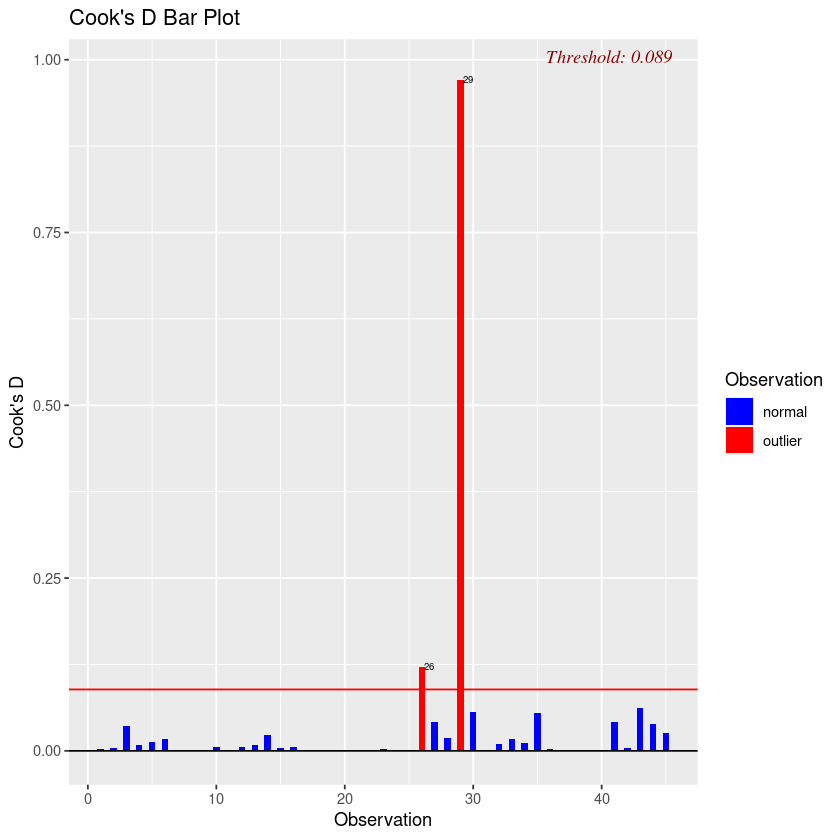

In [113]:
ols_plot_cooksd_bar(fit2)

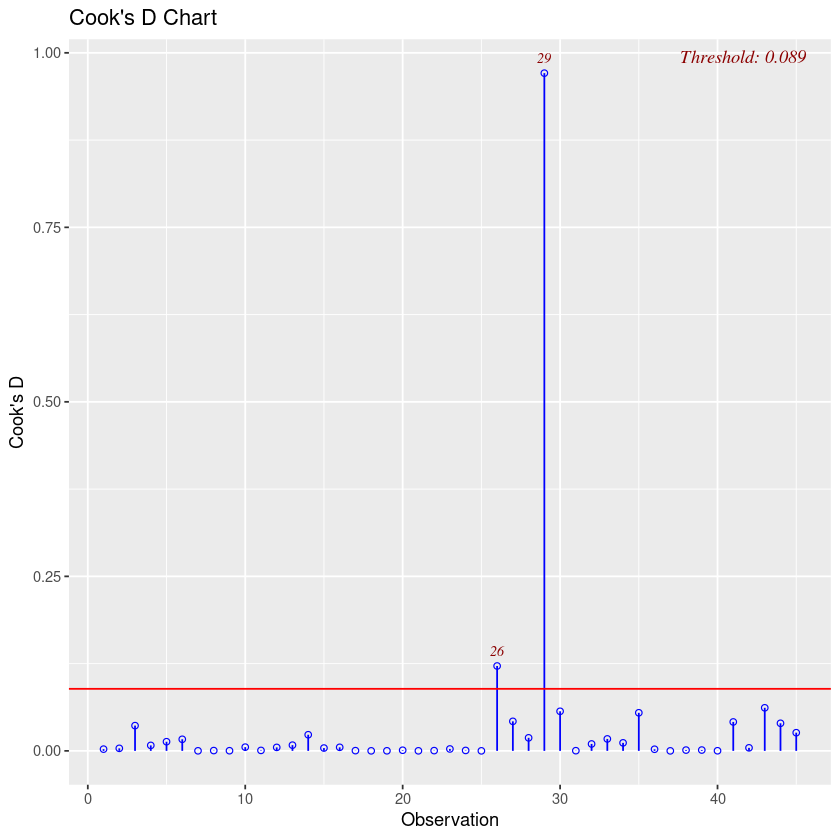

In [114]:
ols_plot_cooksd_chart(fit2)

[[1]]
NULL


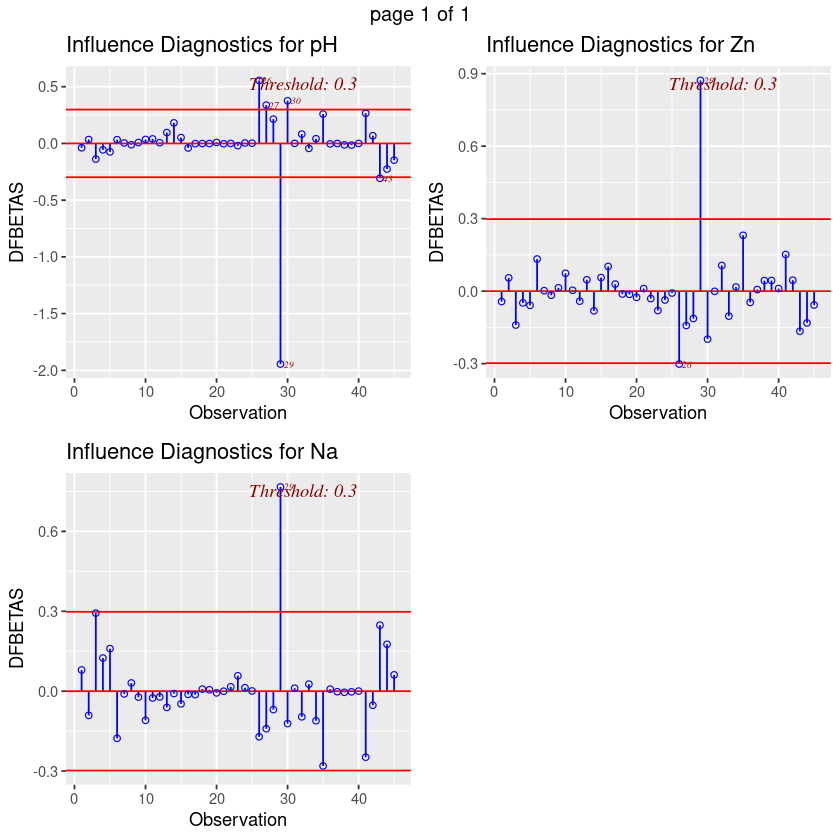

In [115]:
ols_plot_dfbetas(fit2)

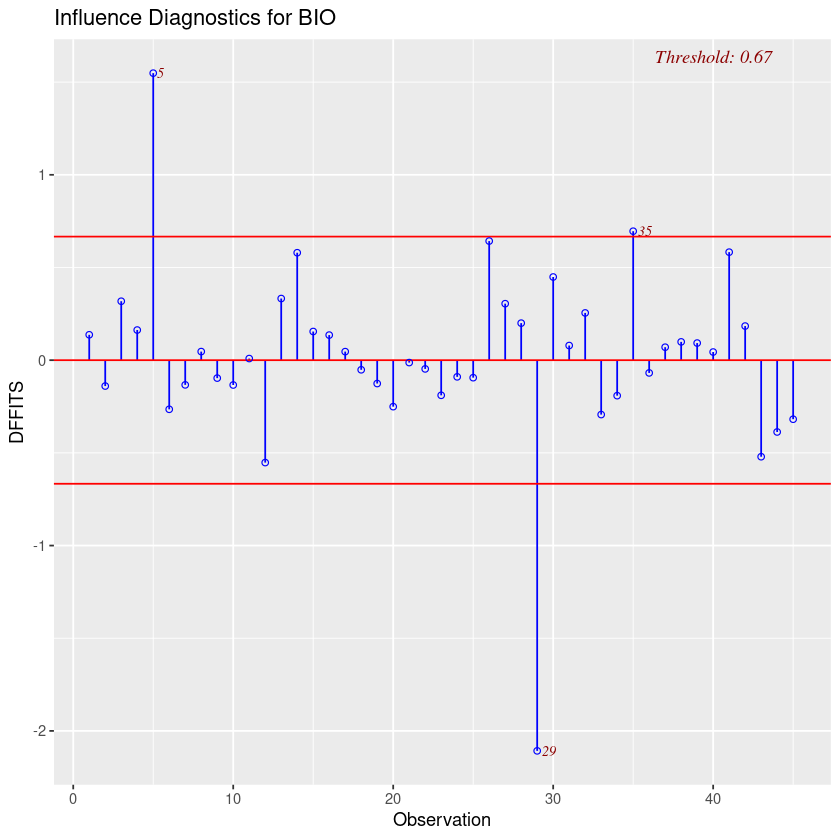

In [116]:
ols_plot_dffits(fit)

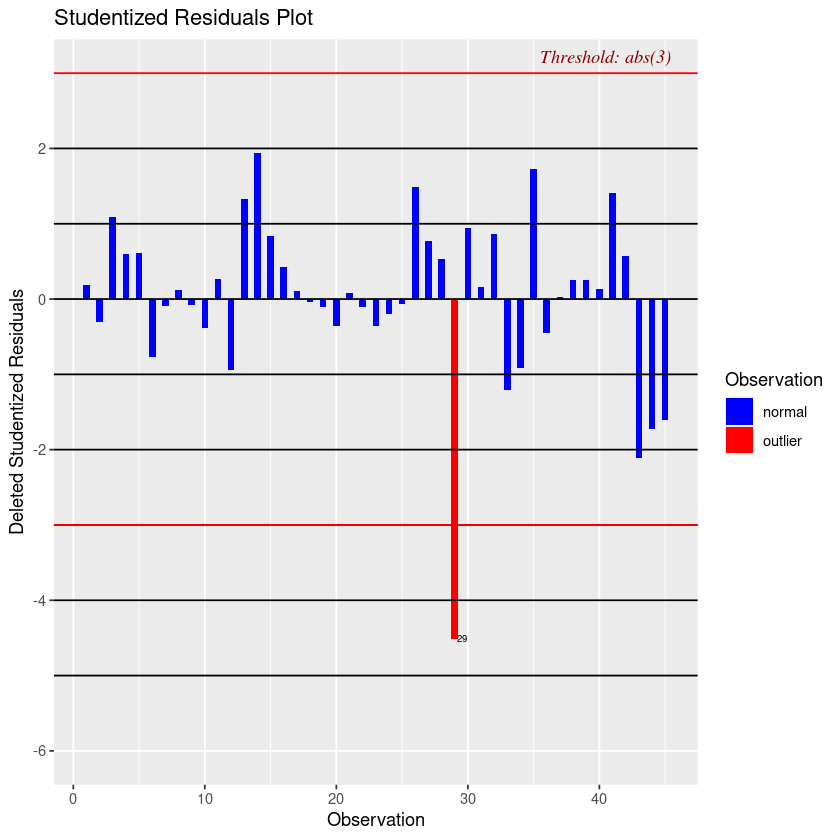

In [117]:
ols_plot_resid_stud(fit2)

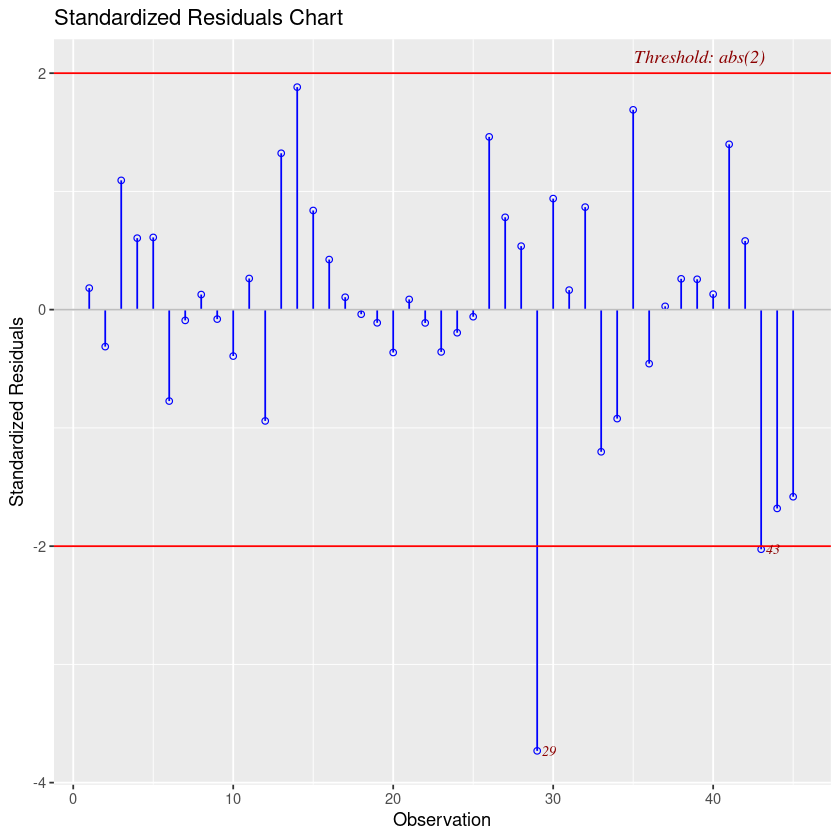

In [118]:
ols_plot_resid_stand(fit2)

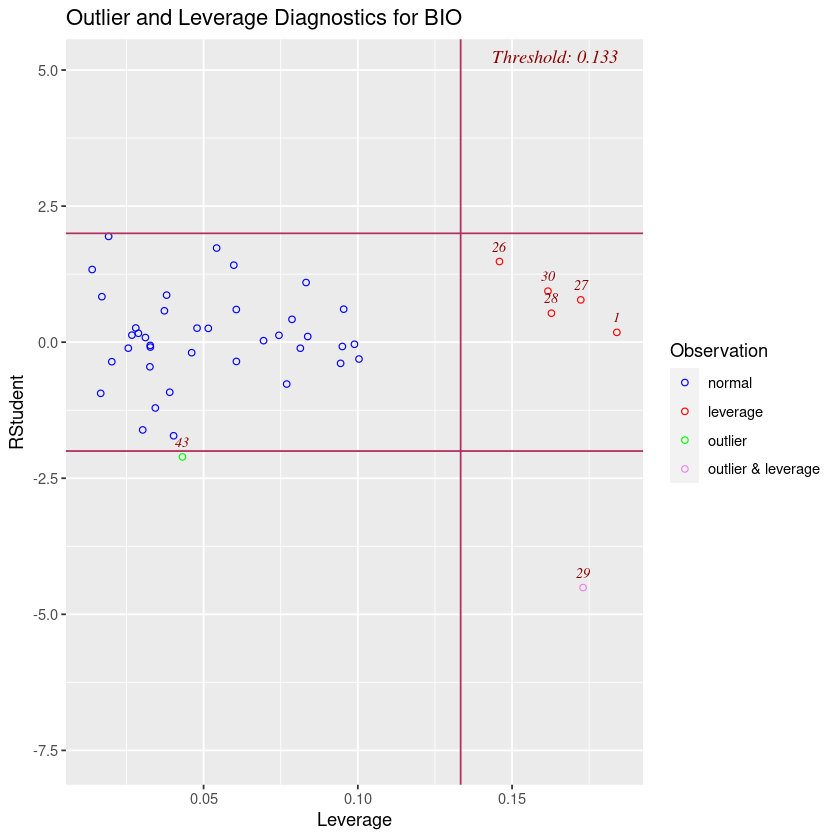

In [119]:
ols_plot_resid_lev(fit2)

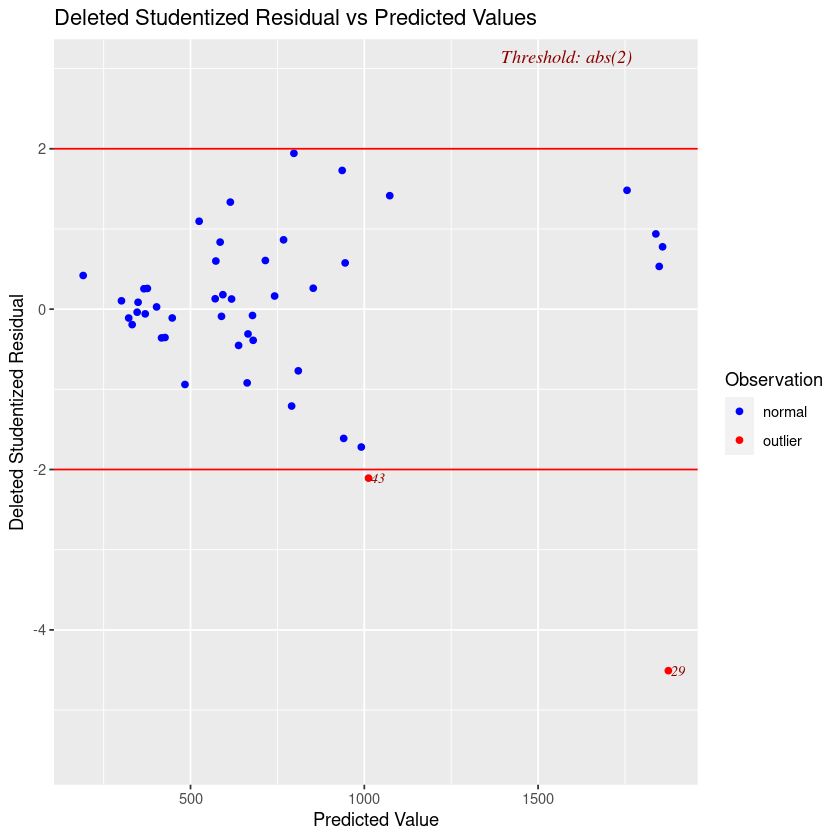

In [120]:
ols_plot_resid_stud_fit(fit2)

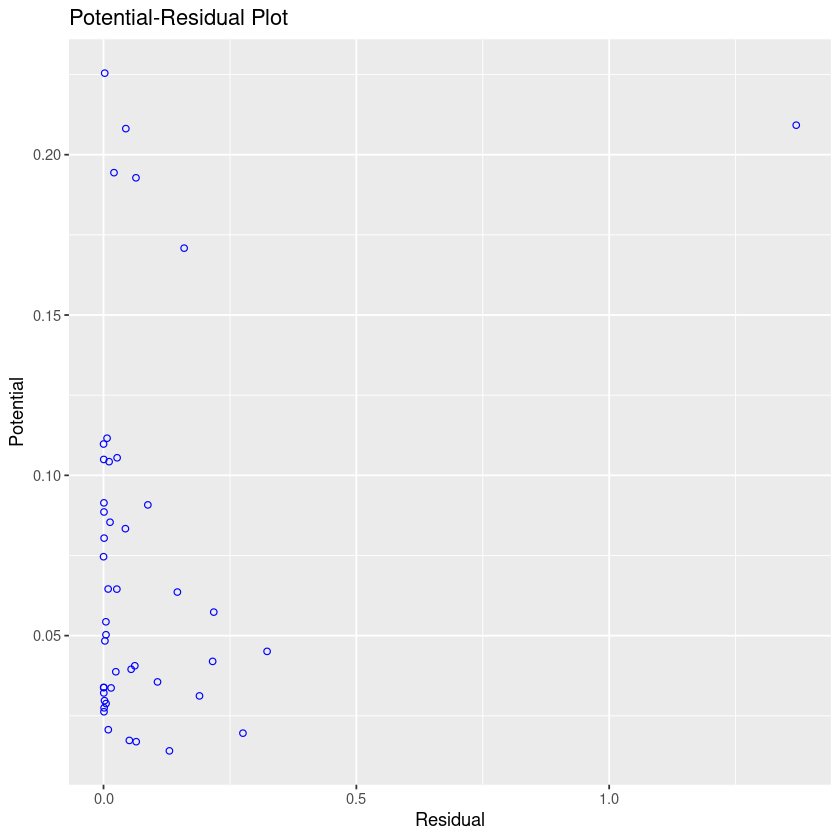

In [121]:
ols_plot_resid_pot(fit2)

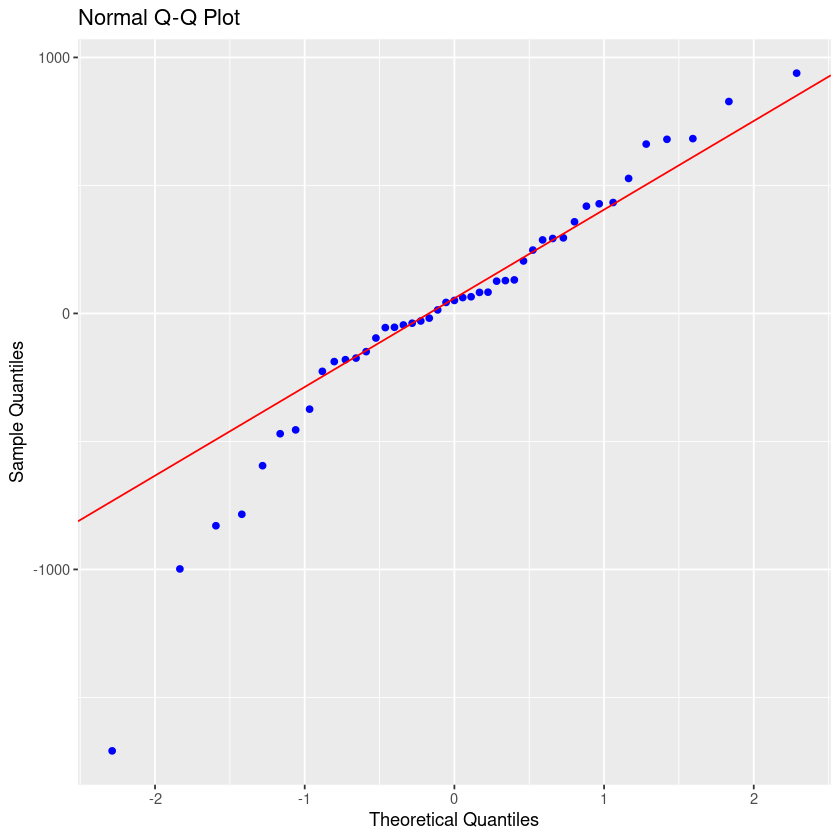

[1] 29 43

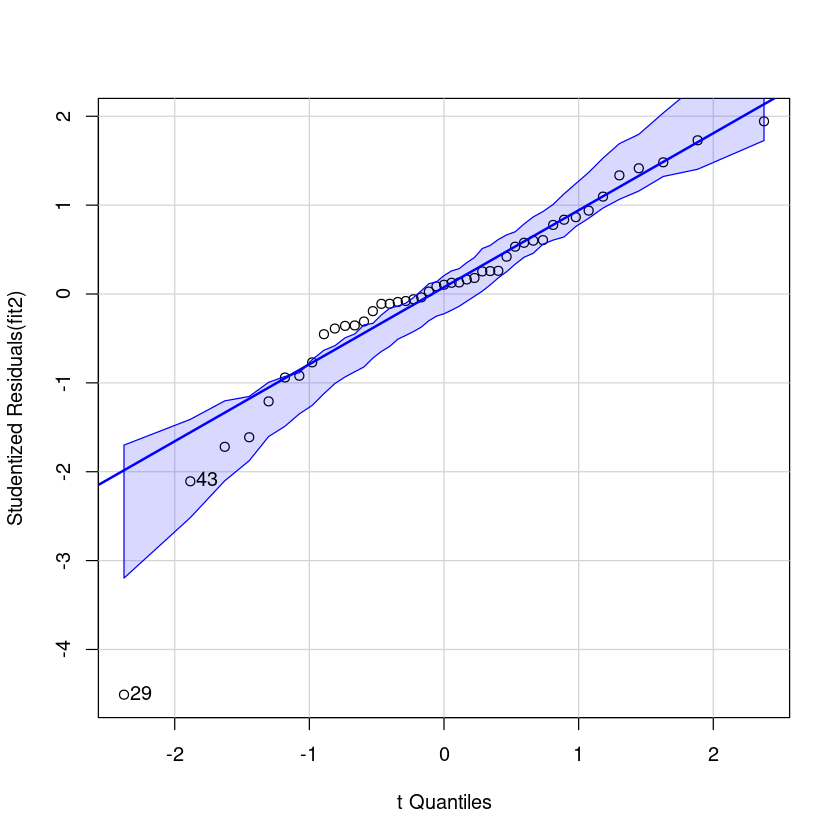

In [122]:
ols_plot_resid_qq(fit2); car::qqPlot(fit2)

In [123]:
ols_test_normality(fit2)

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9371         0.0168 
Kolmogorov-Smirnov        0.141          0.3030 
Cramer-von Mises          3.8889         0.0000 
Anderson-Darling          0.8202         0.0315 
-----------------------------------------------

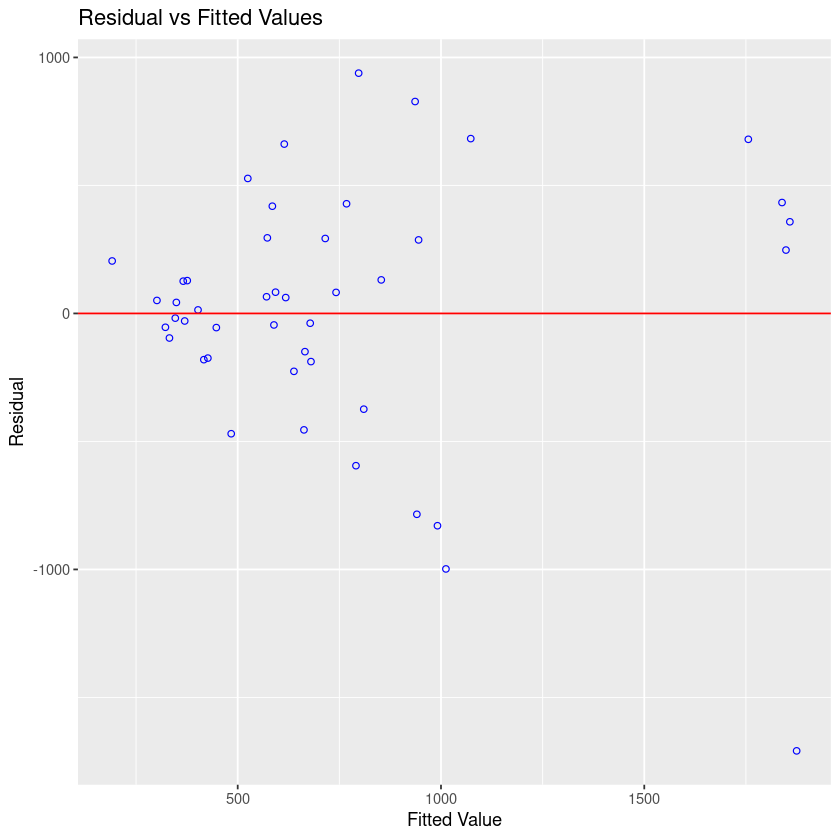

In [124]:
ols_plot_resid_fit(fit2)

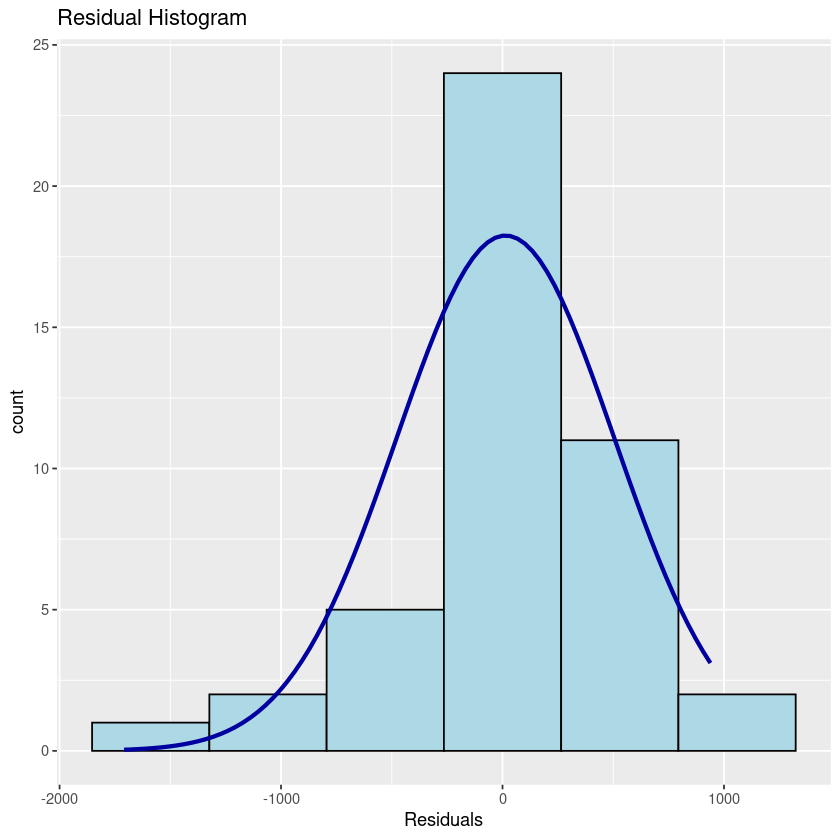

In [125]:
ols_plot_resid_hist(fit2)

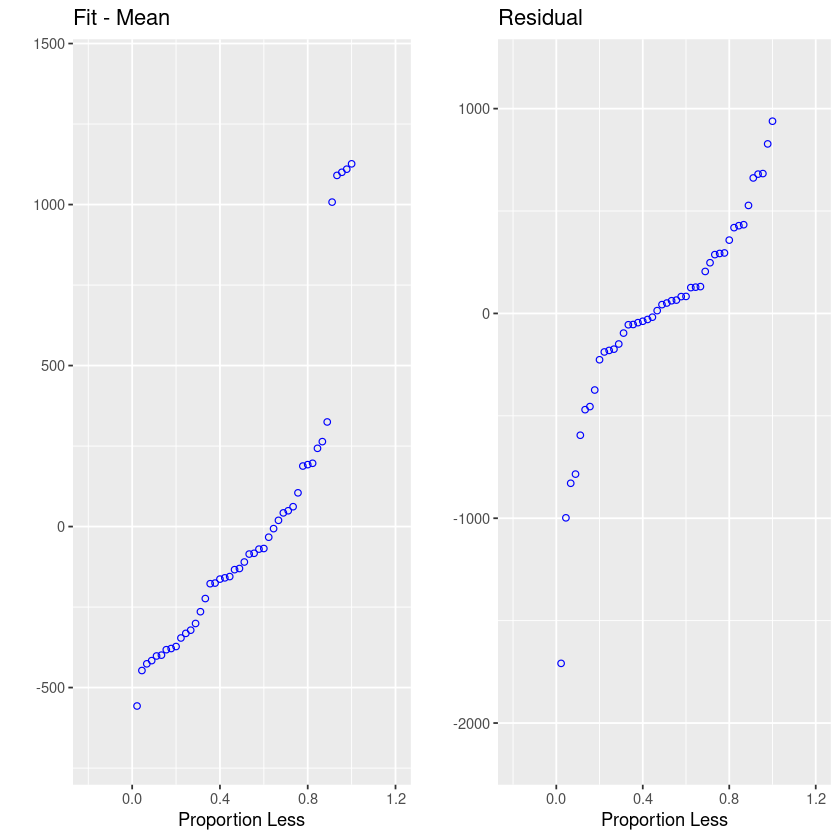

In [126]:
ols_plot_resid_fit_spread(fit2)

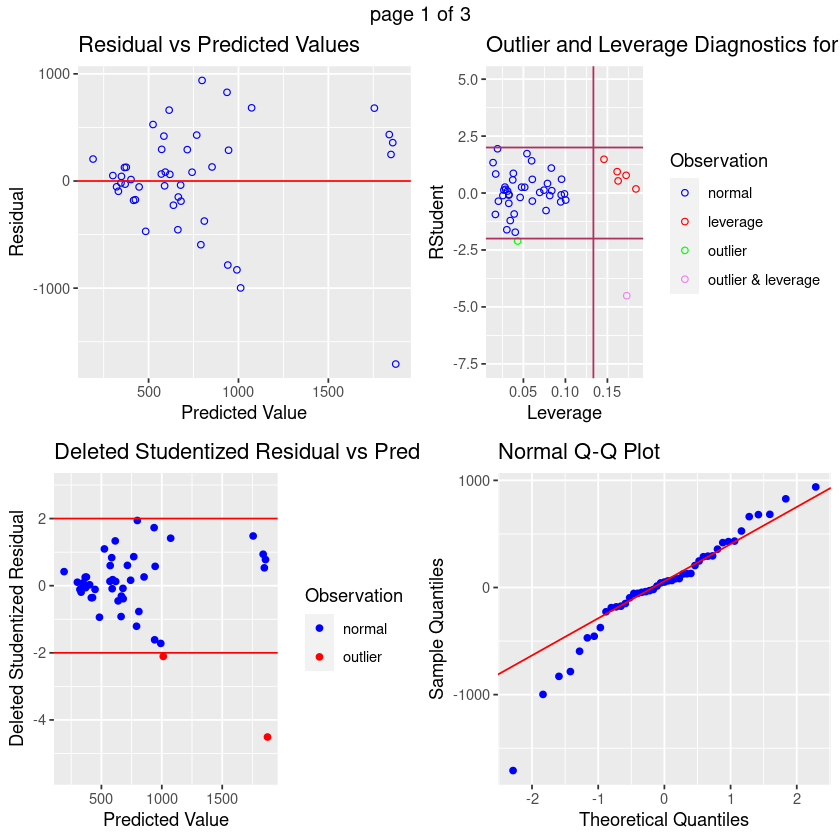

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL


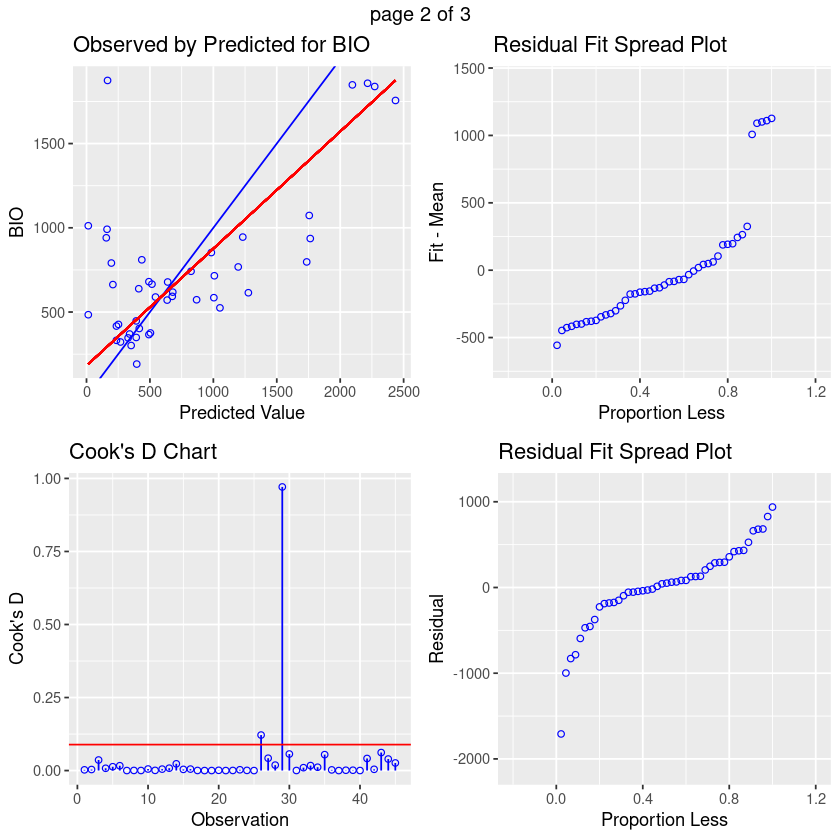

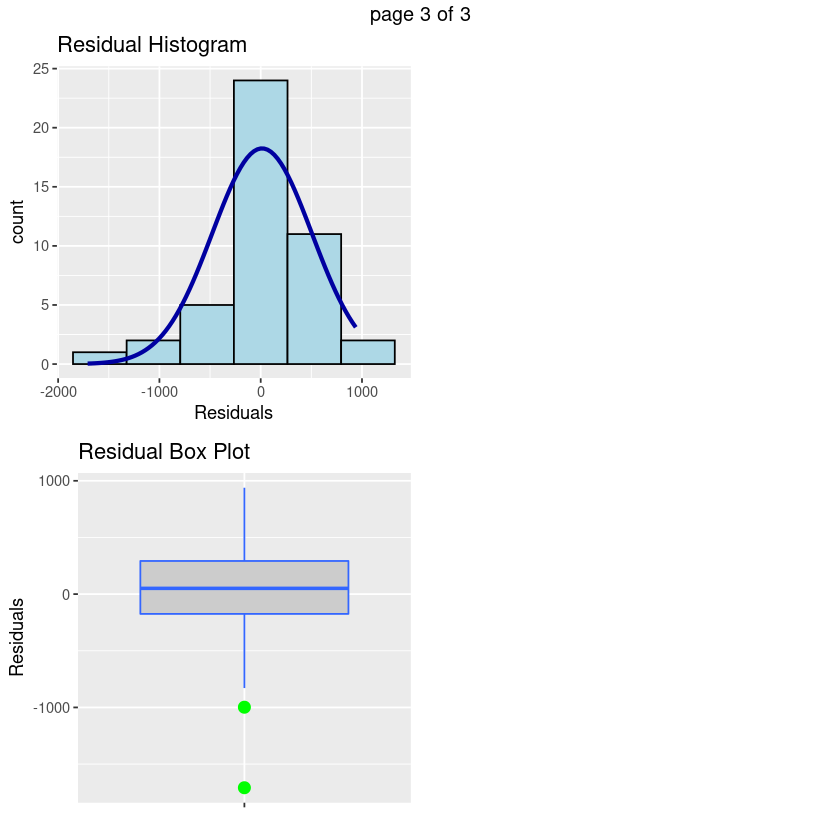

In [127]:
ols_plot_diagnostics(fit2)

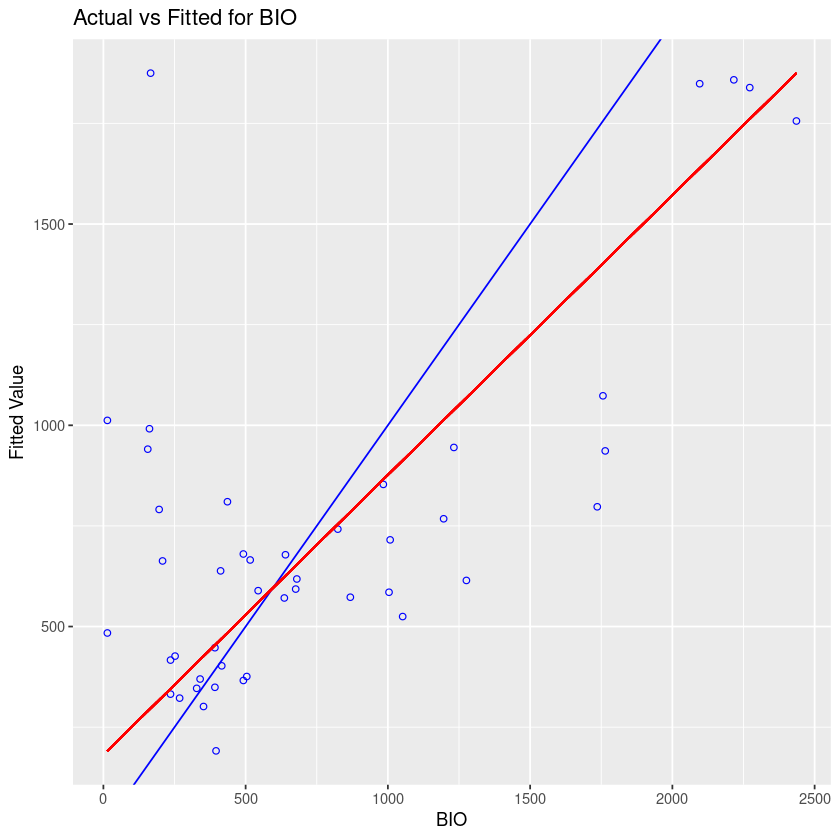

In [128]:
ols_plot_obs_fit(fit2)

In [ ]:
ols_pure_error_anova(fit2)